### Imports

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Data

In [45]:
train = pd.read_csv('../datasets/Selected_train_data.csv')
test = pd.read_csv('../datasets/Selected_test_data1.csv')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Preprocessing and Feature Engineering

In [25]:
train

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,SalePrice
0,109,6,1976,2,1,475.0,725.0,1479,725,754,130500
1,544,7,1996,2,1,559.0,913.0,2122,913,1209,220000
2,153,5,1953,1,0,246.0,1057.0,1057,1057,0,109000
3,318,5,2006,2,1,400.0,384.0,1444,744,700,174000
4,255,6,1900,2,0,484.0,676.0,1445,831,614,138500
...,...,...,...,...,...,...,...,...,...,...,...
2044,1587,8,2007,2,0,520.0,1884.0,1728,1728,0,298751
2045,785,4,1940,1,0,539.0,861.0,861,861,0,82500
2046,916,6,1928,1,1,342.0,896.0,1913,1172,741,177000
2047,639,4,1956,1,0,294.0,1200.0,1200,1200,0,144000


In [26]:
# Fullbath x halfbath
train['FbathxHbath'] = train['Full Bath'] * train['Half Bath']
train.head()

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,SalePrice,FbathxHbath
0,109,6,1976,2,1,475.0,725.0,1479,725,754,130500,2
1,544,7,1996,2,1,559.0,913.0,2122,913,1209,220000,2
2,153,5,1953,1,0,246.0,1057.0,1057,1057,0,109000,0
3,318,5,2006,2,1,400.0,384.0,1444,744,700,174000,2
4,255,6,1900,2,0,484.0,676.0,1445,831,614,138500,0


<Axes: >

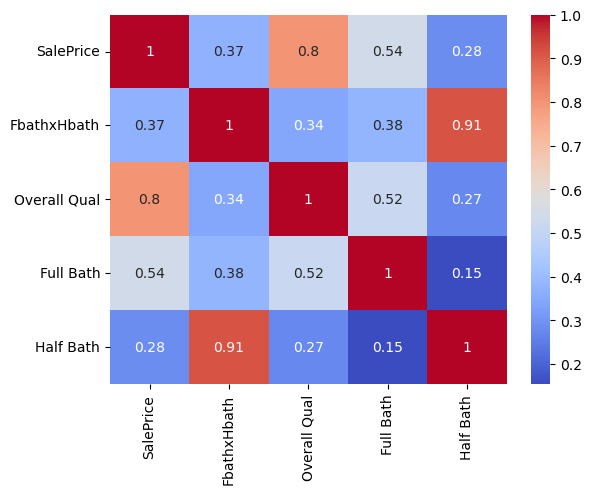

In [27]:
sns.heatmap(train[['SalePrice', 'FbathxHbath', 'Overall Qual', 'Full Bath', 'Half Bath']].corr(),
           cmap='coolwarm', annot=True)

### Polynomial Features

In [28]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [29]:
X_poly = poly.fit_transform(train.drop(columns=['Id', 'SalePrice']))
X_poly = pd.DataFrame(X_poly)
X_poly['Id'] = train['Id']
X_poly['SalePrice'] = train['SalePrice']

In [47]:
X_poly.to_csv('../datasets/Transforms_Xtrain.csv', index=False)

In [31]:
Xtest_poly = poly.transform(test.drop(columns=['Id']))

In [32]:
Xtest_poly = pd.DataFrame(Xtest_poly)
Xtest_poly['Id'] = test['Id']

In [46]:
Xtest_poly.to_csv('../datasets/Transforms_Xtest.csv', index=False)

### Standard Scalar

In [34]:
train

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,SalePrice,FbathxHbath
0,109,6,1976,2,1,475.0,725.0,1479,725,754,130500,2
1,544,7,1996,2,1,559.0,913.0,2122,913,1209,220000,2
2,153,5,1953,1,0,246.0,1057.0,1057,1057,0,109000,0
3,318,5,2006,2,1,400.0,384.0,1444,744,700,174000,2
4,255,6,1900,2,0,484.0,676.0,1445,831,614,138500,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,1587,8,2007,2,0,520.0,1884.0,1728,1728,0,298751,0
2045,785,4,1940,1,0,539.0,861.0,861,861,0,82500,0
2046,916,6,1928,1,1,342.0,896.0,1913,1172,741,177000,1
2047,639,4,1956,1,0,294.0,1200.0,1200,1200,0,144000,0


In [35]:
sc = StandardScaler()
trainsc = sc.fit_transform(train.drop(columns=['Id', 'SalePrice']))
trainsc = pd.DataFrame(trainsc)
trainsc['Id'] = train['Id']
trainsc['SalePrice'] = train['SalePrice']

In [48]:
trainsc.to_csv('../datasets/Train_StandardScaled.csv')

In [37]:
test

,Id,Overall Qual,Year Built,Full Bath,Half Bath,Garage Area,Total Bsmt SF,Gr Liv Area,1st Flr SF,2nd Flr SF,FbathxHbath
0,2658,6,1910,2,0,440,1020,1928,908,1020,0
1,2718,5,1977,2,0,580,1967,1967,1967,0,0
2,2414,7,2006,2,1,426,654,1496,664,832,2
3,1989,5,1923,1,0,480,968,968,968,0,0
4,625,6,1963,1,1,514,1394,1394,1394,0,1
...,...,...,...,...,...,...,...,...,...,...,...
873,1662,6,1974,2,1,488,1084,1877,1084,793,2
874,1234,6,1966,2,1,480,1104,1988,1104,884,2
875,1373,5,1968,1,0,322,952,1211,1211,0,0
876,1672,4,1971,1,0,528,864,864,864,0,0


In [38]:
testsc = sc.transform(test.drop(columns=['Id']))
testsc = pd.DataFrame(testsc)
testsc['Id'] = test['Id']


In [49]:
testsc.to_csv('../datasets/Test_StandardScaled.csv')

### Poly and StandardScalar

In [40]:
X_poly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,Id,SalePrice
0,6.0,1976.0,2.0,1.0,475.0,725.0,1479.0,725.0,754.0,2.0,36.0,11856.0,12.0,6.0,2850.0,4350.0,8874.0,4350.0,4524.0,12.0,3904576.0,3952.0,1976.0,938600.0,1432600.0,2922504.0,1432600.0,1489904.0,3952.0,4.0,2.0,950.0,1450.0,2958.0,1450.0,1508.0,4.0,1.0,475.0,725.0,1479.0,725.0,754.0,2.0,225625.0,344375.0,702525.0,344375.0,358150.0,950.0,525625.0,1072275.0,525625.0,546650.0,1450.0,2187441.0,1072275.0,1115166.0,2958.0,525625.0,546650.0,1450.0,568516.0,1508.0,4.0,109,130500
1,7.0,1996.0,2.0,1.0,559.0,913.0,2122.0,913.0,1209.0,2.0,49.0,13972.0,14.0,7.0,3913.0,6391.0,14854.0,6391.0,8463.0,14.0,3984016.0,3992.0,1996.0,1115764.0,1822348.0,4235512.0,1822348.0,2413164.0,3992.0,4.0,2.0,1118.0,1826.0,4244.0,1826.0,2418.0,4.0,1.0,559.0,913.0,2122.0,913.0,1209.0,2.0,312481.0,510367.0,1186198.0,510367.0,675831.0,1118.0,833569.0,1937386.0,833569.0,1103817.0,1826.0,4502884.0,1937386.0,2565498.0,4244.0,833569.0,1103817.0,1826.0,1461681.0,2418.0,4.0,544,220000
2,5.0,1953.0,1.0,0.0,246.0,1057.0,1057.0,1057.0,0.0,0.0,25.0,9765.0,5.0,0.0,1230.0,5285.0,5285.0,5285.0,0.0,0.0,3814209.0,1953.0,0.0,480438.0,2064321.0,2064321.0,2064321.0,0.0,0.0,1.0,0.0,246.0,1057.0,1057.0,1057.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60516.0,260022.0,260022.0,260022.0,0.0,0.0,1117249.0,1117249.0,1117249.0,0.0,0.0,1117249.0,1117249.0,0.0,0.0,1117249.0,0.0,0.0,0.0,0.0,0.0,153,109000
3,5.0,2006.0,2.0,1.0,400.0,384.0,1444.0,744.0,700.0,2.0,25.0,10030.0,10.0,5.0,2000.0,1920.0,7220.0,3720.0,3500.0,10.0,4024036.0,4012.0,2006.0,802400.0,770304.0,2896664.0,1492464.0,1404200.0,4012.0,4.0,2.0,800.0,768.0,2888.0,1488.0,1400.0,4.0,1.0,400.0,384.0,1444.0,744.0,700.0,2.0,160000.0,153600.0,577600.0,297600.0,280000.0,800.0,147456.0,554496.0,285696.0,268800.0,768.0,2085136.0,1074336.0,1010800.0,2888.0,553536.0,520800.0,1488.0,490000.0,1400.0,4.0,318,174000
4,6.0,1900.0,2.0,0.0,484.0,676.0,1445.0,831.0,614.0,0.0,36.0,11400.0,12.0,0.0,2904.0,4056.0,8670.0,4986.0,3684.0,0.0,3610000.0,3800.0,0.0,919600.0,1284400.0,2745500.0,1578900.0,1166600.0,0.0,4.0,0.0,968.0,1352.0,2890.0,1662.0,1228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234256.0,327184.0,699380.0,402204.0,297176.0,0.0,456976.0,976820.0,561756.0,415064.0,0.0,2088025.0,1200795.0,887230.0,0.0,690561.0,510234.0,0.0,376996.0,0.0,0.0,255,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,8.0,2007.0,2.0,0.0,520.0,1884.0,1728.0,1728.0,0.0,0.0,64.0,16056.0,16.0,0.0,4160.0,15072.0,13824.0,13824.0,0.0,0.0,4028049.0,4014.0,0.0,1043640.0,3781188.0,3468096.0,3468096.0,0.0,0.0,4.0,0.0,1040.0,3768.0,3456.0,3456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270400.0,979680.0,898560.0,898560.0,0.0,0.0,3549456.0,3255552.0,3255552.0,0.0,0.0,2985984.0,2985984.0,0.0,0.0,2985984.0,0.0,0.0,0.0,0.0,0.0,1587,298751
2045,4.0,1940.0,1.0,0.0,539.0,861.0,861.0,861.0,0.0,0.0,16.0,7760.0,4.0,0.0,2156.0,3444.0,3444.0,3444.0,0.0,0.0,3763600.0,1940.0,0.0,1045660.0,1670340.0,1670340.0,1670340.0,0.0,0.0,1.0,0.0,539.0,861.0,861.0,861.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290521.0,464079.0,464079.0,464079.0,0.0,0.0,741321.0,741321.0,741321.0,0.0,0.0,741321.0,741321.0,0.0,0.0,741321.0,0.0,0.0,0.0,0.0,0.0,785,82500
2046,6.0,1928.0,1.0,1.0,342.0,896.0,1913.0,1172.0,741.0,1.0,36.0,11568.0,6.0,6.0,2052.0,5376.0,11478.0,7032.0,4446.0,6.0,3717184.0,1928.0,1928.0,659376.0,1727488.0,3688264.0,2259616.0,1428648.0,1928.0,1.0,1.0,342.0,896.0,1913.0,1172.0,741.0,1.0,1.0,342.0,896.0,1913.0,1172.0,741.0,1.0,116964.0,306432.0,654246.0,400824.0,253422.0,342.0,802816.0,1714048.0,1050112.0,663936.0,896.0,3659569.0,2242036.0,1417533.0,1913.0,1373584.0,868452.0,1172.0,549081.0,741.0,1.0,916,

In [50]:
scpoly = StandardScaler()
train_polysc = scpoly.fit_transform(X_poly.drop(columns=['Id', 'SalePrice']))
train_polysc = pd.DataFrame(train_polysc)
train_polysc['Id'] = train['Id']
train_polysc['SalePrice'] = X_poly['SalePrice']
train_polysc.to_csv('../datasets/Train_PolyandStandardScaler.csv', index=False)

In [42]:
Xtest_poly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,Id
0,6.0,1910.0,2.0,0.0,440.0,1020.0,1928.0,908.0,1020.0,0.0,36.0,11460.0,12.0,0.0,2640.0,6120.0,11568.0,5448.0,6120.0,0.0,3648100.0,3820.0,0.0,840400.0,1948200.0,3682480.0,1734280.0,1948200.0,0.0,4.0,0.0,880.0,2040.0,3856.0,1816.0,2040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193600.0,448800.0,848320.0,399520.0,448800.0,0.0,1040400.0,1966560.0,926160.0,1040400.0,0.0,3717184.0,1750624.0,1966560.0,0.0,824464.0,926160.0,0.0,1040400.0,0.0,0.0,2658
1,5.0,1977.0,2.0,0.0,580.0,1967.0,1967.0,1967.0,0.0,0.0,25.0,9885.0,10.0,0.0,2900.0,9835.0,9835.0,9835.0,0.0,0.0,3908529.0,3954.0,0.0,1146660.0,3888759.0,3888759.0,3888759.0,0.0,0.0,4.0,0.0,1160.0,3934.0,3934.0,3934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336400.0,1140860.0,1140860.0,1140860.0,0.0,0.0,3869089.0,3869089.0,3869089.0,0.0,0.0,3869089.0,3869089.0,0.0,0.0,3869089.0,0.0,0.0,0.0,0.0,0.0,2718
2,7.0,2006.0,2.0,1.0,426.0,654.0,1496.0,664.0,832.0,2.0,49.0,14042.0,14.0,7.0,2982.0,4578.0,10472.0,4648.0,5824.0,14.0,4024036.0,4012.0,2006.0,854556.0,1311924.0,3000976.0,1331984.0,1668992.0,4012.0,4.0,2.0,852.0,1308.0,2992.0,1328.0,1664.0,4.0,1.0,426.0,654.0,1496.0,664.0,832.0,2.0,181476.0,278604.0,637296.0,282864.0,354432.0,852.0,427716.0,978384.0,434256.0,544128.0,1308.0,2238016.0,993344.0,1244672.0,2992.0,440896.0,552448.0,1328.0,692224.0,1664.0,4.0,2414
3,5.0,1923.0,1.0,0.0,480.0,968.0,968.0,968.0,0.0,0.0,25.0,9615.0,5.0,0.0,2400.0,4840.0,4840.0,4840.0,0.0,0.0,3697929.0,1923.0,0.0,923040.0,1861464.0,1861464.0,1861464.0,0.0,0.0,1.0,0.0,480.0,968.0,968.0,968.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230400.0,464640.0,464640.0,464640.0,0.0,0.0,937024.0,937024.0,937024.0,0.0,0.0,937024.0,937024.0,0.0,0.0,937024.0,0.0,0.0,0.0,0.0,0.0,1989
4,6.0,1963.0,1.0,1.0,514.0,1394.0,1394.0,1394.0,0.0,1.0,36.0,11778.0,6.0,6.0,3084.0,8364.0,8364.0,8364.0,0.0,6.0,3853369.0,1963.0,1963.0,1008982.0,2736422.0,2736422.0,2736422.0,0.0,1963.0,1.0,1.0,514.0,1394.0,1394.0,1394.0,0.0,1.0,1.0,514.0,1394.0,1394.0,1394.0,0.0,1.0,264196.0,716516.0,716516.0,716516.0,0.0,514.0,1943236.0,1943236.0,1943236.0,0.0,1394.0,1943236.0,1943236.0,0.0,1394.0,1943236.0,0.0,1394.0,0.0,0.0,1.0,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,6.0,1974.0,2.0,1.0,488.0,1084.0,1877.0,1084.0,793.0,2.0,36.0,11844.0,12.0,6.0,2928.0,6504.0,11262.0,6504.0,4758.0,12.0,3896676.0,3948.0,1974.0,963312.0,2139816.0,3705198.0,2139816.0,1565382.0,3948.0,4.0,2.0,976.0,2168.0,3754.0,2168.0,1586.0,4.0,1.0,488.0,1084.0,1877.0,1084.0,793.0,2.0,238144.0,528992.0,915976.0,528992.0,386984.0,976.0,1175056.0,2034668.0,1175056.0,859612.0,2168.0,3523129.0,2034668.0,1488461.0,3754.0,1175056.0,859612.0,2168.0,628849.0,1586.0,4.0,1662
874,6.0,1966.0,2.0,1.0,480.0,1104.0,1988.0,1104.0,884.0,2.0,36.0,11796.0,12.0,6.0,2880.0,6624.0,11928.0,6624.0,5304.0,12.0,3865156.0,3932.0,1966.0,943680.0,2170464.0,3908408.0,2170464.0,1737944.0,3932.0,4.0,2.0,960.0,2208.0,3976.0,2208.0,1768.0,4.0,1.0,480.0,1104.0,1988.0,1104.0,884.0,2.0,230400.0,529920.0,954240.0,529920.0,424320.0,960.0,1218816.0,2194752.0,1218816.0,975936.0,2208.0,3952144.0,2194752.0,1757392.0,3976.0,1218816.0,975936.0,2208.0,781456.0,1768.0,4.0,1234
875,5.0,1968.0,1.0,0.0,322.0,952.0,1211.0,1211.0,0.0,0.0,25.0,9840.0,5.0,0.0,1610.0,4760.0,6055.0,6055.0,0.0,0.0,3873024.0,1968.0,0.0,633696.0,1873536.0,2383248.0,2383248.0,0.0,0.0,1.0,0.0,322.0,952.0,1211.0,1211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103684.0,306544.0,389942.0,389942.0,0.0,0.0,906304.0,1152872.0,1152872.0,0.0,0.0,1466521.0,1466521.0,0.0,0.0,1466521.0,0.0,0.0,0.0,0.0,0.0,1373
876,4.0,1971.0,1.0,0.0,528.0,864.0,864.0,864.0,0.0,0.0,16.0,7884.0,4.0,0.0,2112.0,34

In [51]:
test_polysc = scpoly.transform(Xtest_poly.drop(columns=['Id']))
test_polysc = pd.DataFrame(test_polysc)
test_polysc['Id'] = Xtest_poly['Id']
test_polysc.to_csv('../datasets/Test_Poly&StandardScaler.csv', index=False)